In [2]:
from sklearn import datasets

# Iris Dataset

In [3]:
# load iris dataset
df = datasets.load_iris(as_frame=True)['frame']

In [ ]:
df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Preprocessing

Normalize the data. Use StandardScalar for this. This centers everything around 0 and scales each feature to a standard deviation of 1.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
df.iloc[:,:-1] = StandardScaler().fit_transform(df.iloc[:,:-1])
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


## Split the Data into Train and Test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# train_test_split?

In [11]:
train, test = train_test_split(
    df,                           # input the df
    test_size=0.20,               # set test size to be 20% of the dataset
    random_state=42,              # name the random state. it can be anything integer. this just lets us call it again later.
    shuffle=True                  # if you want to shuffle before splitting. you should
    # stratify=df['target']       # stratify the shuffled data on this column...???
)

In [12]:
print(train.shape, test.shape)

(120, 5) (30, 5)


In [13]:
train['target'].value_counts(normalize=True)

target
1    0.341667
0    0.333333
2    0.325000
Name: proportion, dtype: float64

In [14]:
test['target'].value_counts(normalize=True)

target
2    0.366667
0    0.333333
1    0.300000
Name: proportion, dtype: float64

### Let's Stratified anyway

In [14]:
# add stratify='some_column_name'

In [15]:
train, test = train_test_split(
    df, 
    test_size=0.20, 
    random_state=42, 
    shuffle=True, 
    stratify=df['target']
)

In [16]:
train['target'].value_counts(normalize=True)

target
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

In [17]:
test['target'].value_counts(normalize=True)

target
0    0.333333
2    0.333333
1    0.333333
Name: proportion, dtype: float64

#### Better

## Build a Logistic Regression Model

#### (We know it's logistic regression because we have 3 categories here in the target column - 1, 0 and 2)

In [18]:
from sklearn.linear_model import LogisticRegression

### Work with the training set
Separate out the features from the target (X from y).

Do this by defining X_train as all the df EXCEPT the last column (target), and also define y_train as ONLY the last column (target)

In [19]:
X_train = train.drop(columns=['target'])   # whole df minus target column
y_train = train['target']                  # just the target column

Might as well do the test values as well while we're at it

In [20]:
X_test = test.drop(columns=['target'])
y_test = test['target']

## Set up the model that we will use to train the data on
Choose a model and pick the parameters. Call it logreg.

In [21]:
logreg = LogisticRegression(
    penalty=None, 
    class_weight='balanced', 
    max_iter=500,
    random_state=42, 
    verbose=1, 
    n_jobs=1
)

Show the model to the training data and solve for the wieghts.  Setting it to verbose will give you lots of info.

In [22]:
logreg.fit(X_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09861D+00    |proj g|=  4.34333D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     20     22      1     0     0   5.783D-05   4.008D-02
  F =   4.0075026921259194E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=1,
                   penalty=None, random_state=42, verbose=1)

## Predictions and Performance
Predict the class labels.  We do this with a method called predict that takes the feature df as the argument.

In [23]:
p_train = logreg.predict(X_train)
p_train

array([0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0])

Predict class probablities. The probabilities are the actual numbers behind the discsions that gave us the predictions in p above.  Since there are 3 categories for each feature, it looks at how likely it is is to be 0, how likely 1, how likely 2.  The probabilities don't have to add up to 1. It's just a direct max value out of 3 options. You should be able to look at each row and match up the chosen target prediction above with the max probability here.

In [24]:
pp_train = logreg.predict_proba(X_train.iloc[:6,:])
pp_train

array([[9.99998838e-01, 1.16183289e-06, 8.22088596e-29],
       [6.55004841e-07, 2.35811171e-01, 7.64188174e-01],
       [6.11944428e-13, 9.97950832e-01, 2.04916758e-03],
       [9.99978825e-01, 2.11750271e-05, 8.39332047e-29],
       [3.40337028e-07, 9.99971752e-01, 2.79080069e-05],
       [2.86785035e-16, 1.82459859e-03, 9.98175401e-01]])

Let's just look at the first 6 values from the prediction array and compare to the actual data, the y_train

In [25]:
p_train6 = logreg.predict(X_train.iloc[:6,:])
actual6 = y_train.values[:6]

print(f"training array = {p_train6}")
print(f"actual array = {actual6}")

training array = [0 2 1 0 1 2]
actual array = [0 2 1 0 1 2]


Lets check predictions on the test set now

In [26]:
p_test = logreg.predict(X_test.iloc[:6,:])
actual_test = y_test.values[:6]

print(f"test array = {p_test}")
print(f"actual array = {actual_test}")

test array = [0 2 1 1 0 1]
actual array = [0 2 1 1 0 1]


## Check the training set
There are a number of ways to check the model to see if it's good.  You need to determine what is important to you for this model to know what to choose. 

ie, what defines a good model?  Is it Accuracy? Recall? ROC AUC?  I'm not a Data Scientist so I'm not going to go into all of this, but you need to know which metric you are going to test your model on.

For this, let's use accuracy and roc_auc.  Sklearn lets us do these very quickly and easily.

### Accuracy

In [27]:
# import the from metrics the tools you want to use
from sklearn.metrics import accuracy_score, roc_auc_score

In [28]:
# Training data accuracy
training_accuracy = accuracy_score(y_train, p_train)

print(f"train accuracy: {training_accuracy:.2f}")

train accuracy: 0.98


In [29]:
# Test accuracy
test_accuracy = accuracy_score(y_test, logreg.predict(X_test))

print(f"test accuracy: {test_accuracy:.2f}")

test accuracy: 1.00


## ROC AUC

In [30]:
pp_train = logreg.predict_proba(X_train)

In [31]:
pp_test = logreg.predict_proba(X_test)

In [32]:
# Training data ROC AUC
training_auc = roc_auc_score(y_train, pp_train, multi_class='ovo')

print(f"train auc: {training_auc:.2f}")

train auc: 1.00


In [33]:
# Test data ROC AUC
test_auc = roc_auc_score(y_test, pp_test, multi_class='ovo')

print(f"test auc: {test_auc:.2f}")

test auc: 1.00


### Classification Report
If you don't know which metric to use, you can use a cool options that does multiple classification metrics at once.  Sklearn has classification_report that will give you a number to look at all in one shot. It takes for it's arguments: your test target, and your test prediction.

In [34]:
from sklearn.metrics import classification_report

In [35]:
# just a couple of print statements to make it look nice...
print("Test Dataset")
print("---"*20)
print(classification_report(y_test, logreg.predict(X_test)))

Test Dataset
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Weights & Bias
Another way to evaluate your model is by looking at the weights.  You can find the most influential weights but looking for the highest weights.  These are held in an array called coef_ which is a parameter of your logreg method.

In [36]:
logreg.coef_.shape

(3, 4)

So it's this is essentially 3 logreg models (one for 0, one for 1, one for 2) and each has its own weights and biases

Ok, let's use the weights and make some plots.

In [37]:
norm_w = logreg.coef_[0] / logreg.coef_[0].mean()  # look at the normalized weights for one of the classes
norm_w 

array([ 1.18779194, -0.80855883,  1.89760368,  1.72316321])

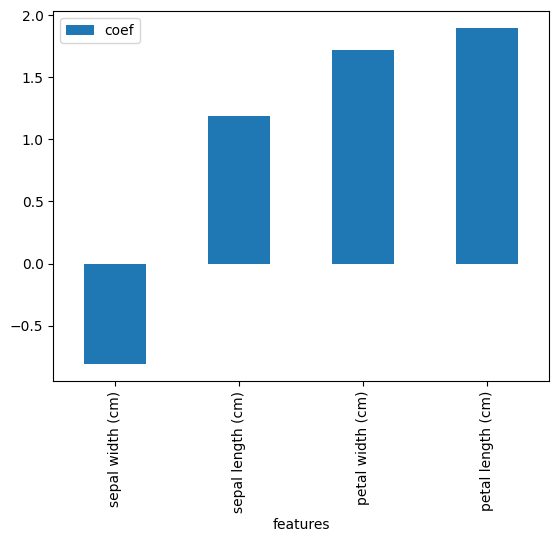

In [38]:
import pandas as pd
import numpy as np

# make a plot by creating a dataframe from the training data, setting the index to the features, sorting by coef and calling plot on it
pd.DataFrame({"coef": norm_w, "features": X_train.columns}).set_index("features").sort_values(by="coef").plot(kind="bar");

## Decision Boundary
Now we'll use the this best 2 features to create a decision boundary plot of these two most influential features.

In [39]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [40]:
# get the 2 most important features by abs val (this is some pandas magic...)
best_2 = pd.DataFrame(np.abs(logreg.coef_)).T.mean(axis=1).sort_values(ascending=False).index[:2].values
best_2

array([2, 3])

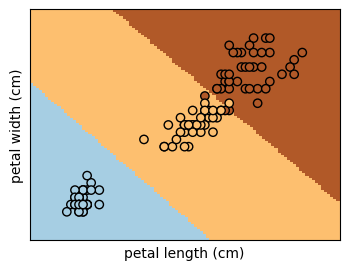

In [41]:
# make a new model consisting of the 2 best features
X = X_train.iloc[:, best_2]
Y = y_train

logreg_plot =  LogisticRegression(
    penalty=None,
    random_state=0,
    class_weight='balanced',
    max_iter=500,
    n_jobs=-1
).fit(X,Y)

# Now we plot
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg_plot,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel=X.columns[0],
    ylabel=X.columns[1],
    eps=0.5,
)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()